In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis 

In [2]:
# loading the data from csv file to a pandas data frame

insurance = pd.read_csv("D:\ML_PROJECTS\insurance_3.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# number rows and columns
insurance.shape

(1338, 7)

In [4]:
# getting the information about dataset

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features:- Sex, Smoker, Region 

In [5]:
# checking the missing values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [6]:
# statistical measure of the dataset

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


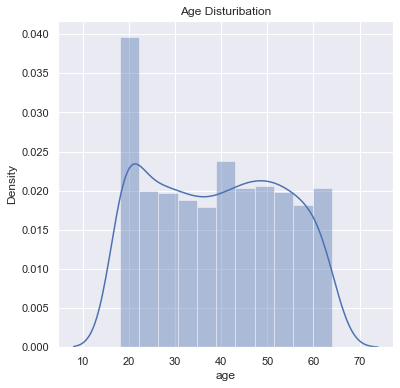

In [7]:
# disturibation of the age group

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age Disturibation')
plt.show()

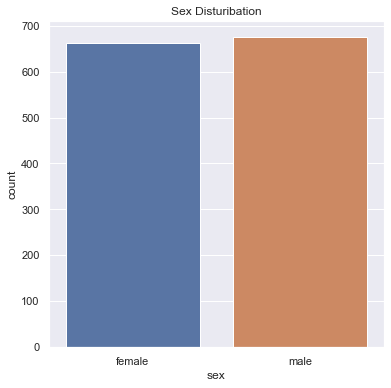

In [13]:
# gender disturibation 

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance)
plt.title('Sex Disturibation')
plt.show()

In [16]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


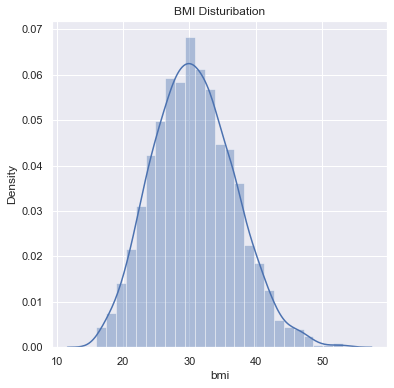

In [17]:
# bmi disturibation 

plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Disturibation')
plt.show()

#### Normal BMI = 18.5 to 24.9 (weight/height) 

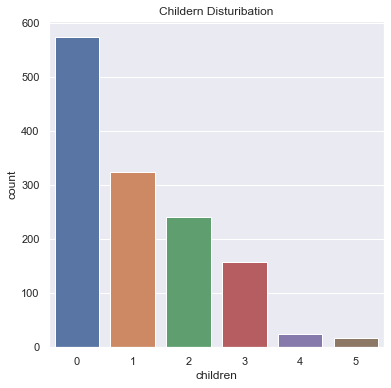

In [19]:
# childern columns

plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance)
plt.title('Childern Disturibation')
plt.show()

In [21]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

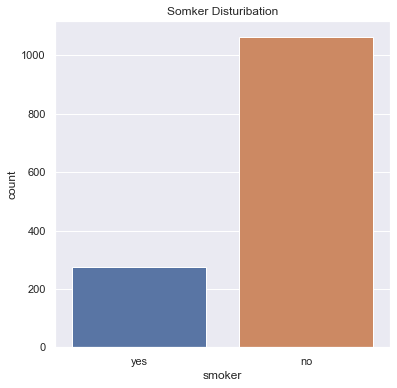

In [24]:
# columns smoker

plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance)
plt.title('Somker Disturibation')
plt.show()

In [23]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

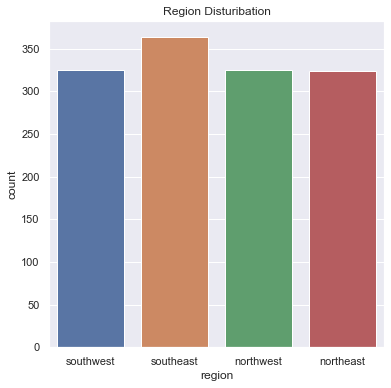

In [25]:
# region columns 

plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance)
plt.title('Region Disturibation')
plt.show()

In [27]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


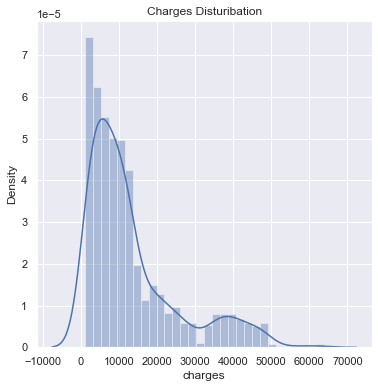

In [29]:
# disturibation of the charges group


plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Disturibation')
plt.show()

## Data Pre-processing

### Encoding the categorical features 

In [39]:
# encoding the sex column
insurance.replace({'sex':{'male':0, 'female': 1}}, inplace = True)

# encoding the smoker column
insurance.replace({'smoker':{'yes':0, 'no': 1}}, inplace = True)

# encoding the region column
insurance.replace({'region':{'southeast':0, 'southwest': 1, 'northeast':2, 'northwest':3}})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the Features and Target

In [40]:
x = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [41]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [42]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into testing data and tearing data 

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training 

In [46]:
# loading the linear regression model

regressor = LinearRegression()

In [47]:
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation 

In [48]:
# prediction on the training data

training_data_prediction = regressor.predict(x_train)

In [50]:
# R square value

r2_train = metrics.r2_score(y_train, training_data_prediction)
print( "R Square Value :", r2_train)

R Square Value : 0.751505643411174


In [51]:
# prediction on the testing data

testing_data_prediction = regressor.predict(x_test)

In [53]:
# R square value

r2_test = metrics.r2_score(y_test, testing_data_prediction)
print( "R Square Value :", r2_test)

R Square Value : 0.7447273869684077


## Building A Predictive System 

In [57]:
input_data = (62,1,26.29,0,0,0)  # encoding happen here


# changing the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


prediction = regressor.predict(input_data_reshaped)

print("The prediction value in USD:", prediction[0])

The prediction value in USD: 35663.596572204304


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
